<h1>Demonstration of Samplers</h1>

In [1]:
import trata.sampler as sampler
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Latin Hypercube</h2>
<p>Ranges in each dimension are divided in to N subintervals. For each sample point, an interval is randomly selected from each dimension, and the point is selected uniformly within the intersection of those intervals. Once a point has been sampled from an interval, that interval can no longer be selected to be sampled from.</p>

In [2]:
lhs_sampler = sampler.LatinHyperCubeSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>box</code></li>
    The bounding box
    <li><code>seed</code></li>
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>geo_degree</code></li>
    Degree for geometric Latin Hypercube. Causes points to cluster near edges or near center of bounding box.
</ul>

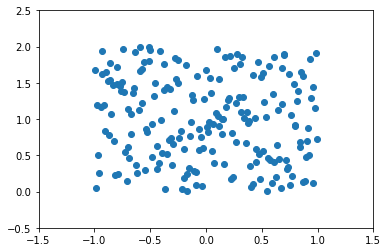

In [3]:
lhs_points = lhs_sampler.sample_points(num_points=200, box=[[-1,1],[0,2]], seed=42)
lhs_points = lhs_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(lhs_points[0], lhs_points[1],'o')

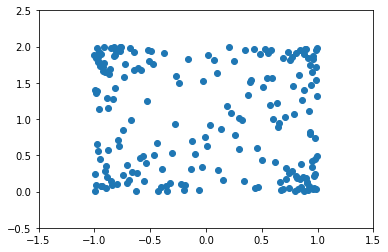

In [4]:
geo_lhs_points = lhs_sampler.sample_points(num_points=200, box=[[-1,1],[0,2]], geo_degree=1.3, seed=42)
geo_lhs_points = geo_lhs_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(geo_lhs_points[0], geo_lhs_points[1],'o')

<h2>Monte Carlo</h2>
<p>Each dimension is sampled independently from a uniform distribution determined by the ranges given</p>

In [5]:
mc_sampler = sampler.MonteCarloSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>box</code></li>
    The bounding box
    <li><code>seed</code></li>
</ul>

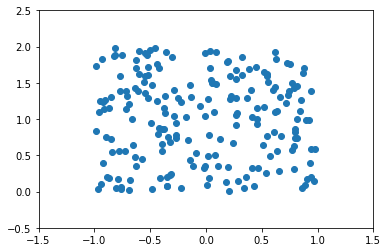

In [6]:
mc_points = mc_sampler.sample_points(num_points=200, box=[[-1,1],[0,2]], seed=42)
mc_points = mc_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(mc_points[0], mc_points[1],'o')

<h2>Uniform</h2>
<p>Each dimension is divided in to N linearly spaced points. Choosing to have equal area divisions will place points in the middle of the divisions instead of on the edges. The result is a line of points from the corner of all low extents to the corner of all high extents.</p>

In [7]:
uni_sampler = sampler.UniformSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>box</code></li>
    The bounding box
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>equal_area_divs</code></li>
    Whether to place points in the center of the division areas or at the edges
</ul>

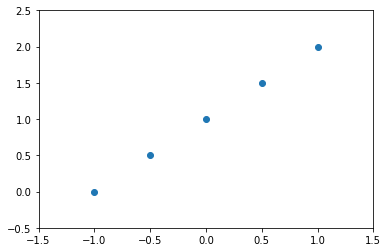

In [8]:
uni_points = uni_sampler.sample_points(num_points=5, box=[[-1,1],[0,2]])
uni_points = uni_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(uni_points[0], uni_points[1],'o')

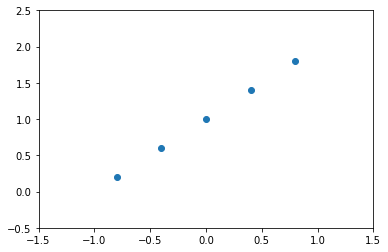

In [9]:
uni_points_equal = uni_sampler.sample_points(num_points=5, box=[[-1,1],[0,2]], equal_area_divs=True)
uni_points_equal = uni_points_equal.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(uni_points_equal[0], uni_points_equal[1], 'o')

<h2>Quasi-Random Number</h2>
<p>Produces a quasi-random set of points that tends to evenly cover space. The sampler will always produce the same sequence given the same inputs.</p>

In [10]:
qrn_sampler = sampler.QuasiRandomNumberSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>box</code></li>
    The bounding box
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>technique</code></li>
    Which type of sequence to use; either Sobol or Halton (Sobol is the default)
    <li><code>at_most</code></li>
    A parameter for Halton Sequences
</ul>

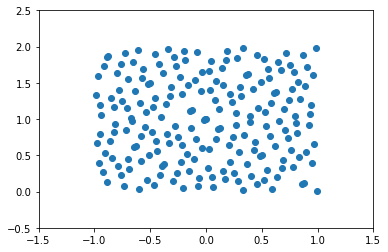

In [11]:
qrn_points_sobol = qrn_sampler.sample_points(num_points=200, box=[[-1,1],[0,2]], technique='sobol')
qrn_points_sobol = qrn_points_sobol.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(qrn_points_sobol[0], qrn_points_sobol[1], 'o')

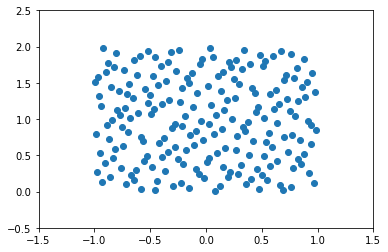

In [ ]:
qrn_points_halton = qrn_sampler.sample_points(num_points=200, box=[[-1,1],[0,2]], technique='halton')
qrn_points_halton = qrn_points_halton.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(qrn_points_halton[0], qrn_points_halton[1], 'o')

<h2>Corners</h2>
<p>Returns points at the corners of the bounding box. If the number of points requested does not equal the number of corners (2^num_dimesions) then the sampler will return only the number requested, with the points possibly repeating in a cycle.</p>

In [13]:
crn_sampler = sampler.CornerSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>box</code></li>
    The bounding box
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
</ul>

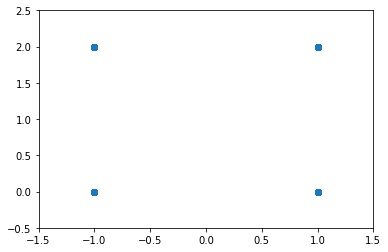

In [14]:
crn_points = crn_sampler.sample_points(nPts=200, box=[[-1,1],[0,2]])
crn_points = crn_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(crn_points[0], crn_points[1], 'o')

<h2>Centered</h2>
<p>Generates a line of points in across a single dimension, while holding the other dimensions constant at the center point. Points in the varying-dimension will vary based on the box range in that dimension. Choosing latin hypercube will generate N center points using latin hypercube sampling, then perform centered sampling using those points as the default points</p>

In [15]:
cen_sampler = sampler.CenteredSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_divisions</code></li>
    The number of sample points per dimension
    <li><code>box</code></li>
    The bounding box
    <li><code>dim_indices</code></li>
    Array of 0 indexed dimension on which to vary
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>default</code></li>
    The point at which the lines of points are centered. Elements of points in non-varying dimensions will all equal the corresponding element from the default.
</ul>
<b>OR</b>
<ul>
    <li><code>type</code></li>
    Whether to perform standard or latin hypercube centered sampling
    <li><code>num_points</code></li>
    The number of center points to generate for latin hypercube centered sampling
</ul>

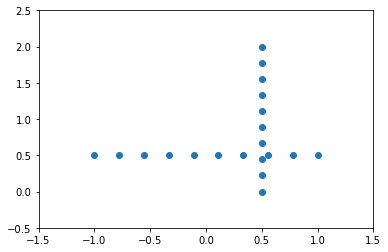

In [16]:
cen_points = cen_sampler.sample_points(num_divisions=10, box=[[-1,1],[0,2]], dim_indices=[0,1], default=[0.5,0.5])
cen_points = cen_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(cen_points[0], cen_points[1], 'o')

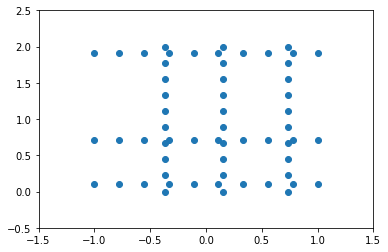

In [17]:
cen_lhs_points = cen_sampler.sample_points(num_divisions=10, box=[[-1,1],[0,2]], dim_indices=[0,1], type='lhs_vals', num_points=3, seed=42)
cen_lhs_points = cen_lhs_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(cen_lhs_points[0], cen_lhs_points[1], 'o')

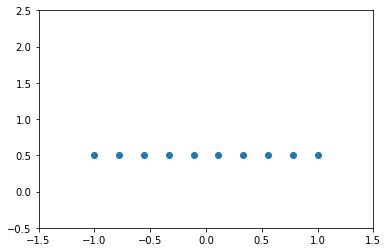

In [18]:
cen_1D_points = cen_sampler.sample_points(num_divisions=10, box=[[-1,1],[0,2]], dim_indices=[0], default=[0.5,0.5])
cen_1D_points = cen_1D_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(cen_1D_points[0], cen_1D_points[1], 'o')

<h2>Cartesian Cross</h2>
<p>Generates the Cartesian product of each variable's values. Able to work with combinations of discrete and continuous dimensions</p>

In [19]:
car_sampler=sampler.CartesianCrossSampler()

<h3>Optional Parameters</h3>
<ul>
    <li><code>num_divisions</code></li>
    Number of divisions in each dimension
    <ul>
        <li>An integer value will produce that many divisions in all dimensions</li>
        <li>An array-like [ ] will produce the number of divisions mapping each value to the corresponding dimension</li>
        <li>An array-like [ [ ] ] will specify the exact values on which to create the points</li>
    </ul>
    <li><code>box</code></li>
    The bounding box
    <li><code>values</code></li>
    A set of values for discrete variables. Continuous dimensions are an empty list.
    <li><code>equal_area_divs</code></li>
    Whether to place points in the center of the division areas or at the edges
</ul>

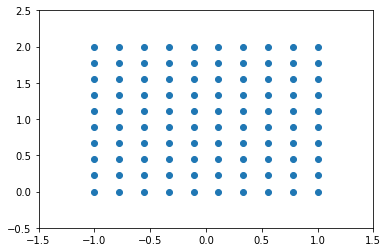

In [20]:
car_cont_points = car_sampler.sample_points(nDiv=10, box=[[-1,1],[0,2]])
car_cont_points = car_cont_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(car_cont_points[0], car_cont_points[1], 'o')

In [21]:
car_disc_points = car_sampler.sample_points(num_divisions=[2,3], box=[[],[]], values=[['foo', 'bar'], [1,2,3]])
print(car_disc_points)

[['foo' '1']
 ['foo' '2']
 ['foo' '3']
 ['bar' '1']
 ['bar' '2']
 ['bar' '3']]


In [22]:
car_mixed_points = car_sampler.sample_points(num_divisions=[11,3], box=[[-1,1],[]], values=[[],['foo', 'bar', 'zzyzx']])
print(car_mixed_points)

[['-1.0' 'foo']
 ['-1.0' 'bar']
 ['-1.0' 'zzyzx']
 ['-0.8' 'foo']
 ['-0.8' 'bar']
 ['-0.8' 'zzyzx']
 ['-0.6' 'foo']
 ['-0.6' 'bar']
 ['-0.6' 'zzyzx']
 ['-0.4' 'foo']
 ['-0.4' 'bar']
 ['-0.4' 'zzyzx']
 ['-0.2' 'foo']
 ['-0.2' 'bar']
 ['-0.2' 'zzyzx']
 ['0.0' 'foo']
 ['0.0' 'bar']
 ['0.0' 'zzyzx']
 ['0.2' 'foo']
 ['0.2' 'bar']
 ['0.2' 'zzyzx']
 ['0.4' 'foo']
 ['0.4' 'bar']
 ['0.4' 'zzyzx']
 ['0.6' 'foo']
 ['0.6' 'bar']
 ['0.6' 'zzyzx']
 ['0.8' 'foo']
 ['0.8' 'bar']
 ['0.8' 'zzyzx']
 ['1.0' 'foo']
 ['1.0' 'bar']
 ['1.0' 'zzyzx']]


<h2>One at a Time (OAT)</h2>
<p></p>

In [23]:
oat_sampler = sampler.OneAtATimeSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>box</code></li>
    The bounding box
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>default</code></li>
    The default (center) point
    <li><code>use_low</code></li>
    Whether to include a point with all the low values from bounding box
    <li><code>use_high</code></li>
    Whether to include a point with all the high values from bounding box
    <li><code>use_default</code></li>
    Whether to include the default point
    <li><code>do_oat</code></li>
    Whether to perform one at a time sampling. Each dimension is chosen one at a time to use the high and low values in that dimension. The other dimension's values for the point come from the given default value
</ul>

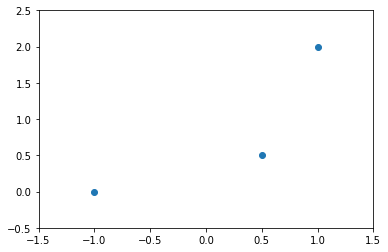

In [24]:
hi_lo_def_points = oat_sampler.sample_points(box=[[-1,1],[0,2]], default=[.5,.5], use_high=True, use_low=True, use_default=True)
hi_lo_def_points = hi_lo_def_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(hi_lo_def_points[0], hi_lo_def_points[1], 'o')

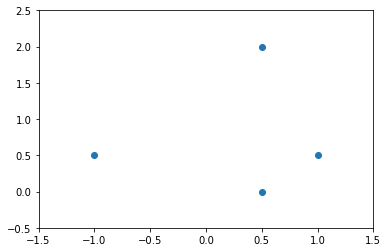

In [25]:
oat_points = oat_sampler.sample_points(box=[[-1,1],[0,2]], default=[.5,.5], do_oat=True)
oat_points = oat_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(oat_points[0], oat_points[1], 'o')

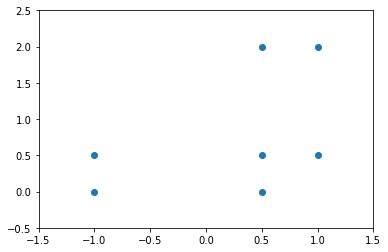

In [ ]:
oat_all_points = oat_sampler.sample_points(box=[[-1,1],[0,2]], default=[.5,.5], do_oat=True, use_high=True, use_low=True, use_default=True)
oat_all_points = oat_all_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(oat_all_points[0], oat_all_points[1], 'o')

<h2>Default Value</h2>
<p>Generates an array of N points simply repeating the default point</p>

In [27]:
def_sampler = sampler.DefaultValueSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>default</code></li>
    The point to repeat
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>box</code></li>
    The bounding box. Used for error checking against the dimension of default
</ul>

In [28]:
def_points = def_sampler.sample_points(num_points=20, default=[.5,.6], box=[[-1,1],[0,2]])
print(def_points)

[[ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]
 [ 0.5  0.6]]


<h2>Sample Points</h2>
<p>Generates the points given.</p>

In [29]:
sp_sampler = sampler.SamplePointsSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>samples</code></li>
    The list of samples to use
</ul>

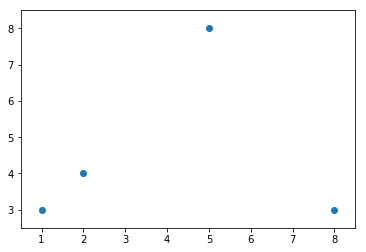

In [30]:
sp_points = sp_sampler.sample_points(samples=[[1,3],[2,4],[8,3],[5,8]])
sp_points = sp_points.T
plt.xlim([.5,8.5])
plt.ylim([2.5,8.5])
plt.plot(sp_points[0], sp_points[1], 'o')

<h2>Probaility Density Function</h2>
<p>Generates points from scipy's stat distributions. The parameters for location, scale, and degrees of freedom are passed directly to scipy's implementation. Each dimension is be sampled independently.</p>

In [31]:
pdf_sampler = sampler.ProbabilityDensityFunctionSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
    <li><code>dist</code></li>
    Which distribution to sample from
    <li><b>One of</b></li>
    <ul>
        <li><code>num_dim</code></li>
        Number of Dimensions
        <li><code>box</code></li>
        The bounding box. Only used to infer number of dimensions
    </ul>
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>seed</code></li>
    Random seed
    <li><code>loc</code></li>
    The location parameter of the distribution
    <li><code>scale</code></li>
    The scale parameter of the distribution
    <li><code>df</code></li>
    The degrees of freedom parameter of the distribution
    <li><code>s</code></li>
    The 's' parameter of the distribution    
</ul>

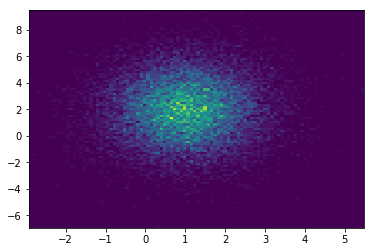

In [32]:
pdf_points_norm = pdf_sampler.sample_points(num_points=20000, dist='norm', num_dim=2, loc=[1,2], scale=[1,2])
pdf_points_norm = pdf_points_norm.T
plt.hist2d(pdf_points_norm[0], pdf_points_norm[1], bins=100)

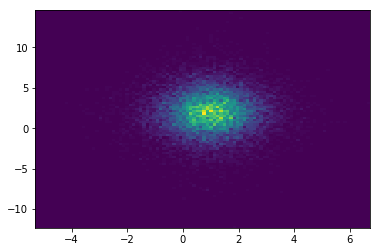

In [33]:
pdf_points_t = pdf_sampler.sample_points(num_points=20000, dist='t', loc=[1,2], scale=[1,2], df=[15,10], num_dim=2)
pdf_points_t = pdf_points_t.T
plt.hist2d(pdf_points_t[0], pdf_points_t[1], bins=100)

<h2>Multi-variate Normal</h2>
<p>Gives points sampled from scipy's multivariate gaussian normal distribution.</p>

In [34]:
mvn_sampler = sampler.MultiNormalSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_points</code></li>
    The number of sample points
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>mean</code></li>
    Length N array of distribution mean
    <li><code>covariance</code></li>
    N-by-N array of distribution covariance
</ul>

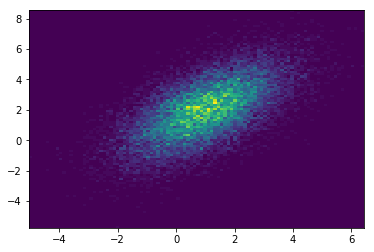

In [35]:
mvn_points = mvn_sampler.sample_points(nPts=20000, mean=[1,2], covariance=[[2,1.5],[1.5,3]])
mvn_points = mvn_points.T
plt.hist2d(mvn_points[0], mvn_points[1], bins=100);

<h2>Face</h2>
<p>Performs Cartesian Cross sampling in n-1 dimensions on each 'face' of the hyper volume.</p>

In [36]:
face_sampler = sampler.FaceSampler()

<h3>Required Parameters</h3>
<ul>
    <li><code>num_divisions</code></li>
    Number of divisions in each dimension
    <ul>
        <li>An integer value will produce that many divisions in all dimensions</li>
        <li>An array-like [ ] will produce the number of divisions mapping each value to the corresponding dimension</li>
        <li>An array-like [ [ ] ] will specify the exact values on which to create the points</li>
    </ul>
    <li><code>box</code></li>
    The bounding box
</ul>
<h3>Optional Parameters</h3>
<ul>
    <li><code>equal_area_divs</code></li>
    Whether to place points in the center of the division areas or at the edges
</ul>

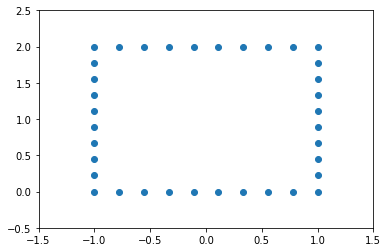

In [37]:
face_points = face_sampler.sample_points(nDiv=10, box=[[-1,1],[0,2]])
face_points = face_points.T
plt.xlim([-1.5,1.5])
plt.ylim([-.5,2.5])
plt.plot(face_points[0], face_points[1], 'o')
